In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kunalsharma2134
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/resume-dataset/UpdatedResumeDataSet.csv")

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df['Category'].value_counts().reset_index()

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Sales,40
8,Data Science,40
9,Mechanical Engineer,40


In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

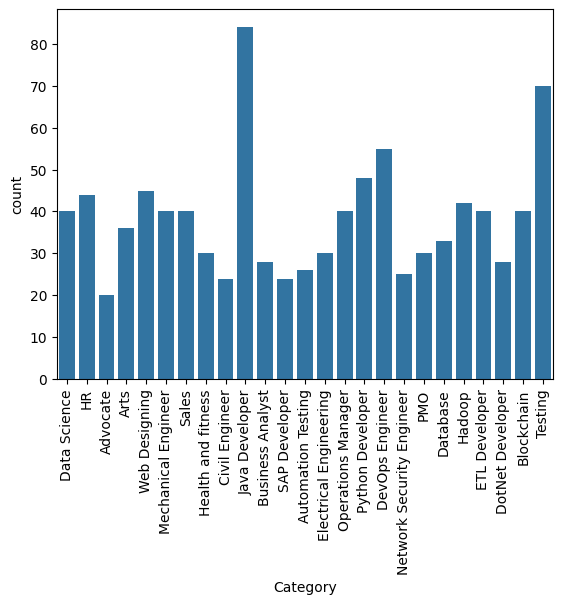

In [17]:
sns.countplot(data=df,x='Category')
plt.xticks(rotation = 90 )
plt.show()

In [20]:
import re

def cleanresume(txt):
  cleantext = re.sub('http\S+\s',' ',txt)
  cleantext = re.sub('RT|cc',' ',cleantext)
  cleantext = re.sub('#\S+\s',' ',cleantext)
  cleantext = re.sub('@\S+',' ',cleantext)
  cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleantext)
  cleantext = re.sub(r'[^\x00-\x7f]',' ',cleantext)
  cleantext = re.sub('\s+',' ',cleantext)

  return cleantext

In [24]:
df['Resume'] = df['Resume'].apply(lambda x : cleanresume(x))

In [25]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [29]:
df['Category'] = le.fit_transform(df['Category'])

In [31]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfid = TfidfVectorizer(stop_words='english')

In [76]:

Required_Text = tfid.fit_transform(df['Resume'])

In [77]:
Required_Text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,x_test,Y_train,y_test = train_test_split(Required_Text,df['Category'],test_size=0.2,random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [68]:
clf = OneVsRestClassifier(KNeighborsClassifier())

In [69]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(x_test)

In [70]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [71]:
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [72]:
import pickle
pickle.dump(tfid,open('tfid.pickle','wb'))
pickle.dump(clf,open('clf.pickle','wb'))

In [73]:
myresume = """
Name: Rahul Sharma
Email: rahul.sharma@example.com
Phone: +91-9876543210

Summary:
A highly motivated Data Science enthusiast with 2+ years of experience in building machine learning models, data analysis, and deploying predictive analytics solutions.

Skills * Programming Languages: Python (pandas, numpy, scikit-learn), SQL, R, Java
* Machine Learning: Regression, Classification, Random Forest, XGBoost, KMeans, SVM, PCA
* Data Visualization: Tableau, PowerBI, Matplotlib, Seaborn
* Tools/Frameworks: Git, Docker, Flask, Jupyter, VS Code, AWS, Linux
* Other: HTML, CSS, JavaScript, APIs, RESTful Services

Education Details
B.Sc. (Hons) Statistics - Delhi University (2017–2020)
PG Diploma in Data Science - IIIT Bangalore (2020–2021)

Experience
Data Analyst - ABC Tech Solutions Pvt Ltd
Duration: Aug 2021 – Present
Responsibilities:
- Built predictive models to identify customer churn with 85% accuracy.
- Automated reporting using Python and SQL, reducing manual effort by 40%.
- Created interactive dashboards in Tableau for management insights.

Skill Details
Python - Experience - 24 months
SQL - Experience - 24 months
Tableau - Experience - 18 months

Company Details
Company: ABC Tech Solutions Pvt Ltd
Description: A data-driven technology consulting firm focused on analytics and cloud-based solutions.

"""

In [79]:
import pickle

tfid = pickle.load(open('tfid.pickle', 'rb'))
clf = pickle.load(open('clf.pickle', 'rb'))

cleaned_resume = cleanresume(myresume)

input_features = tfid.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: 'Java Developer',
    23: 'Testing',
    8 : 'Devops Engineer',
    20: 'Python Developer',
    24: 'Web Designing',
    12: 'HR',
    13: 'Hadoop',
    3: 'Block Chain',
    10: 'ETL Developer',
    18: 'Operation Manager',
    6: 'Data Science',
    22: 'Sales',
    16: 'Mechanical Engineer',
    1: 'Arts',
    7: 'DataBase',
    11: 'Electrical Engineer',
    14: 'Health and Fitness',
    19: 'PMO',
    4: 'Buisness Analyst',
    9: 'DotNet Developer',
    2: 'Automation Testing',
    17: 'Network Testing Engineer',
    21: 'SAP Developer',
    5: 'Civil Engineer',
    0: 'Advocate'
}

category_name = category_mapping.get(prediction_id,'Unknown')
print('Prediction Category: ',category_name)

print(prediction_id)

Prediction Category:  Data Science
6


In [61]:
input_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 115 stored elements and shape (1, 115)>